# Component 1: Spectrogram

## 1. Tohok Earthquake Location Data
We used here the backend **matplotlib nbagg** instead of **matplotlib inline** because'inline' does not support some interactive functions we need later on. __[(1)](https://stackoverflow.com/questions/27704490/interactive-pixel-information-of-an-image-in-python)__ __[(2)](https://matplotlib.org/faq/usage_faq.html)__ 

In [1]:
%matplotlib nbagg

In [2]:
#import the libaries we need to use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
#from bqplot import pyplot as plt 

from __future__ import print_function
import numpy as np

from bqplot import (
    Axis, ColorAxis, LinearScale, DateScale, DateColorScale, OrdinalScale,
    OrdinalColorScale, ColorScale, Scatter, Lines, Figure, Tooltip
)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from bqplot import (
    Figure, Map, Mercator, Orthographic, ColorScale, ColorAxis,
    AlbersUSA, topo_load, Tooltip
)


In [3]:
#reads into the location.txt file, provides headers
locations=pd.read_table("data/location.txt",names=["longitude","latitude","default1","default2"],sep="\t")

By viewing the tables in the above step, we found out that the two columns 'default1' and 'default2' are irrelevant for our analysis, so we decided to cut them out.

In [4]:
#drop the irrelevant columns default1, defulat 2
locations.drop(["default1","default2"],inplace=True,axis=1)

The number 0 to 437 corresponds to the **station**, so we define it here:

In [5]:
locations["station"]=np.arange(1000,1438)

In [6]:
#resetting the index to 'station'
locations.set_index("station", inplace=True)

In [7]:
#A sanity check to see if our index worked, by locating index number 1
locations.loc[1001]

longitude   -98.102
latitude     26.938
Name: 1001, dtype: float64

## Location of Tohoku earthquake  
### According to NASA's __[Earth Observertory website](https://earthobservatory.nasa.gov/IOTD/view.php?id=49621)__, the Tohoku earthquake struck Japan at "at 38.3 degrees North latitude and 142.4 degrees East longitude". Based on this information, we set the center location of Tohoku accordingly (Longitude, Latitude).

In [8]:
#center point of the tohoku earthquake
tohoku_location=(-142.4,38.3)

In [9]:
locations.index

Int64Index([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009,
            ...
            1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437],
           dtype='int64', name='station', length=438)

In [10]:
#calculate the distance from tohoku location to each station
from haversine import haversine
locations["distance"]=[haversine(locations.loc[i],tohoku_location) for i in locations.index]

In [11]:
locations.head()

,longitude,latitude,distance
station,,,
1000,-98.683,27.065,4882.202882
1001,-98.102,26.938,4945.643921
1002,-98.068,26.463,4951.013870
1003,-117.110,32.889,2836.018544
1004,-107.790,32.532,3862.182187


In [12]:
#sort the location by the distances from the center point
locations=locations.sort_values("distance")

In [13]:
locations.index

Int64Index([1211, 1193, 1228, 1244, 1194, 1288, 1257, 1165, 1272, 1151,
            ...
            1063, 1050, 1121, 1359, 1375, 1242, 1286, 1269, 1304, 1287],
           dtype='int64', name='station', length=438)

## 2. Tohoku Earthquake time and magnitude data

In [14]:
#read into the time & magnitude file
array_vals=pd.read_csv("data/data_tohoku_norm_transpose.csv",header=None)

### We decided to create a range, for selecting time for 4 hours the frequency is of 1 second each. 

In [15]:
v = pd.date_range("2:46PM", "6:46PM", freq="1s")
v -= v[0]
array_vals["time"] = v
array_vals.set_index("time", inplace=True)

array_vals.columns=np.arange(1000,1438)
array_vals.isnull().any().any()

True

### Normalization 

In [16]:
#normalize magnitude in range [0.1] 
min_val=array_vals.min().min()
max_val=array_vals.max().max()
norm_array_vals=(array_vals-min_val)/(max_val-min_val)
norm_array_vals.columns = np.arange(1000,1438)
norm_array_vals.isnull().any().any()

True

In [17]:
#adds in the location data 

norm_array_vals=norm_array_vals[locations.index]


In [18]:
#checking how the tables look like now 
norm_array_vals.head()
norm_array_vals.transpose().head()

time,0 days 00:00:00,0 days 00:00:01,0 days 00:00:02,0 days 00:00:03,0 days 00:00:04,0 days 00:00:05,0 days 00:00:06,0 days 00:00:07,0 days 00:00:08,0 days 00:00:09,...,0 days 03:59:51,0 days 03:59:52,0 days 03:59:53,0 days 03:59:54,0 days 03:59:55,0 days 03:59:56,0 days 03:59:57,0 days 03:59:58,0 days 03:59:59,0 days 04:00:00
1211,0.623412,0.623189,0.622979,0.622786,0.622615,0.622467,0.622345,0.622248,0.622175,0.622125,...,0.618684,0.618954,0.619258,0.619590,0.619947,0.620323,0.620714,0.621114,0.621514,0.621904
1193,0.624967,0.625078,0.625176,0.625260,0.625330,0.625384,0.625421,0.625443,0.625450,0.625445,...,0.621636,0.621831,0.622030,0.622227,0.622420,0.622607,0.622785,0.622952,0.623107,0.623248
1228,0.624088,0.623944,0.623804,0.623673,0.623554,0.623448,0.623355,0.623276,0.623212,0.623163,...,0.620600,0.620829,0.621076,0.621333,0.621592,0.621845,0.622090,0.622323,0.622544,0.623890
1244,0.623702,0.623781,0.623859,0.623933,0.624003,0.624066,0.624122,0.624170,0.624210,0.624241,...,0.616177,0.616465,0.616844,0.617301,0.617824,0.618397,0.619002,0.619622,0.620242,0.623890
1194,0.624130,0.624215,0.624296,0.624369,0.624433,0.624488,0.624534,0.624570,0.624597,0.624616,...,0.626709,0.626415,0.626131,0.625859,0.625601,0.625357,0.625127,0.624911,0.624710,0.624527


### Without normalization

In [19]:
#station number is in numerical order
array_vals.isnull().any().any()
norm_array_vals.isnull().any().any()

True

# Replacing the Nan values with the average values.

In [20]:
#norm_array_vals.fillna(0, inplace=True)
avg=norm_array_vals.mean()
norm_array_vals= norm_array_vals.fillna((avg[1049]+avg[1050] )/2)

In [21]:
#Station numbers are in order by distance to the center location 
norm_array_vals.head()

,1211,1193,1228,1244,1194,1288,1257,1165,1272,1151,...,1063,1050,1121,1359,1375,1242,1286,1269,1304,1287
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.623412,0.624967,0.624088,0.623702,0.624130,0.623970,0.623856,0.624079,0.623781,0.623555,...,0.62389,0.623797,0.623839,0.623919,0.623819,0.624691,0.623909,0.623900,0.623740,0.623914
00:00:01,0.623189,0.625078,0.623944,0.623781,0.624215,0.624050,0.623844,0.623950,0.623769,0.623483,...,0.62389,0.623794,0.623857,0.623972,0.624001,0.624460,0.623894,0.623833,0.623947,0.623843
00:00:02,0.622979,0.625176,0.623804,0.623859,0.624296,0.624127,0.623831,0.623824,0.623758,0.623417,...,0.62389,0.623792,0.623876,0.624023,0.624178,0.624231,0.623879,0.623769,0.624148,0.623774
00:00:03,0.622786,0.625260,0.623673,0.623933,0.624369,0.624198,0.623820,0.623705,0.623749,0.623359,...,0.62389,0.623791,0.623894,0.624069,0.624344,0.624010,0.623865,0.623709,0.624337,0.623710
00:00:04,0.622615,0.625330,0.623554,0.624003,0.624433,0.624261,0.623811,0.623595,0.623741,0.623309,...,0.62389,0.623791,0.623910,0.624111,0.624496,0.623803,0.623852,0.623655,0.624509,0.623652


In [22]:
#plt.imshow(norm_array_vals.transpose(), aspect = 'auto', cmap = 'jet')

In [23]:
norm_array_vals.transpose().head()

time,0 days 00:00:00,0 days 00:00:01,0 days 00:00:02,0 days 00:00:03,0 days 00:00:04,0 days 00:00:05,0 days 00:00:06,0 days 00:00:07,0 days 00:00:08,0 days 00:00:09,...,0 days 03:59:51,0 days 03:59:52,0 days 03:59:53,0 days 03:59:54,0 days 03:59:55,0 days 03:59:56,0 days 03:59:57,0 days 03:59:58,0 days 03:59:59,0 days 04:00:00
1211,0.623412,0.623189,0.622979,0.622786,0.622615,0.622467,0.622345,0.622248,0.622175,0.622125,...,0.618684,0.618954,0.619258,0.619590,0.619947,0.620323,0.620714,0.621114,0.621514,0.621904
1193,0.624967,0.625078,0.625176,0.625260,0.625330,0.625384,0.625421,0.625443,0.625450,0.625445,...,0.621636,0.621831,0.622030,0.622227,0.622420,0.622607,0.622785,0.622952,0.623107,0.623248
1228,0.624088,0.623944,0.623804,0.623673,0.623554,0.623448,0.623355,0.623276,0.623212,0.623163,...,0.620600,0.620829,0.621076,0.621333,0.621592,0.621845,0.622090,0.622323,0.622544,0.623890
1244,0.623702,0.623781,0.623859,0.623933,0.624003,0.624066,0.624122,0.624170,0.624210,0.624241,...,0.616177,0.616465,0.616844,0.617301,0.617824,0.618397,0.619002,0.619622,0.620242,0.623890
1194,0.624130,0.624215,0.624296,0.624369,0.624433,0.624488,0.624534,0.624570,0.624597,0.624616,...,0.626709,0.626415,0.626131,0.625859,0.625601,0.625357,0.625127,0.624911,0.624710,0.624527


# for the plt.imshow line - do we use array_vals or norm_array_vals? 

In [24]:

def make_spect():
    fig, ax = plt.subplots(figsize=(6,4))
    plt.imshow(array_vals.transpose(), aspect = 'auto', cmap = 'viridis',vmin=0, vmax=1)
    plt.colorbar(label="Tohoku Earthquake Magnitude")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Detector')
    ax.set_xlim(0,len(array_vals)-1)
    ax.set_ylim(0,437)
    ann = ax.annotate("", xy=(0,0),xytext=(0,15),textcoords="offset points",
                        bbox=dict(boxstyle="square", fc="w"))
    ann.set_visible(False)

    def hover(event):
        if event.inaxes == ax:
            if event.xdata<(ax.get_xlim()[1]-ax.get_xlim()[0])/2:
                ann.xy=(event.xdata+100,event.ydata)
                print()
            else:
                ann.xy=(event.xdata-5000,event.ydata)
            
            ### The use of new json for map needed 4 digit station id, 
            ### so replaced the station id from 4 digit to 3. 
            
            ann.set_text("detector#=%s\ntime=%s\nmagnitude=%s" %(str(locations.index.values[int(event.ydata)])[1:],
                                                                str(datetime.timedelta(seconds=int(event.xdata))),
                                                                array_vals[int(event.ydata +1000)][int(event.xdata)]))
            ann.set_visible(True)
            
        else:
            ann.set_visible(False)

    fig.canvas.mpl_connect('motion_notify_event', hover)

In [25]:
make_spect()

<IPython.core.display.Javascript object>

Reference:
https://stackoverflow.com/questions/47242637/why-doesnt-imshow-show-pixel-values-when-i-hover-over-it
https://stackoverflow.com/questions/27704490/interactive-pixel-information-of-an-image-in-python

  

## Defining the call back function for the interactivity of the map and waveform.

In [26]:
## get the station id of station based on selection 

def get_station_id():
     
    if(len(states_map.selected )> 0):
        station_id = states_map.selected[0]
    else:
        station_id = initial_station
    return station_id
### Get the waveform for a station from the starting to 
### the selected interval 

def wave_form_detect(station, time):
    x = range(0, time)
    y = array_vals.iloc[:time][station]
    return x, y

### Update the wave whenever the station is changed. 

def upd_wave_det(self, target):
    #print(states_map.selected)
    #print(target['data'])
    new_x, new_y = wave_form_detect(get_station_id(), slider.value)
    wave.x = new_x
    wave.y = new_y


### Update the wave whenever the time  is changed.     
def upd_wave_time(change):
    #print(states_map.selected)
    #print(target['data'])
    new_x, new_y = wave_form_detect(get_station_id(), change['new'])
    wave.x = new_x
    wave.y = new_y
    
    
### Define the color in the linear scale of the stations based on the time. 

def get_col(time): 
    #temp = np.array(norm_array_vals.iloc[time].values.flatten())
    #c_map = np.log10(np.nan_to_num(temp))
    temp = norm_array_vals.iloc[time]
    c_map = np.log10(temp)
    return c_map

## update the detector colors whenever the time is changed. 
   
def upd_col_lat(change): 
    #scat_plot.color=get_col(slider.value)
    states_map.color=get_col(slider.value).to_dict()
    #rint(change.new)
    
def upd_wf_title_det(self, target):
    waveform.title = 'Waveform for station: ' + str(get_station_id()-1000 ) + ' for the time period: ' + str(slider.value)
    
    
def upd_wf_title_time(change):
    #print(change)
    
    waveform.title = 'Waveform for station: ' + str(get_station_id()-1000) + ' for the time period: ' + str(slider.value)

### Create a slider for selecting the time between 0 to 4hrs: 

In [27]:
#int(states_map.selected[0])-1000
#wave_form_detect(states_map.selected,slider.value)

In [28]:
time = pd.Series(range(0,array_vals.shape[0]))
#slider = interactive(get_time, interval=(time.min()+1, time.max()+1, 1))
slider =  widgets.IntSlider(min=time.min(), max=time.max(), value=1500, description='Select Time(s):')
slider.layout = {'min_width':'100%'}
display(slider)

IntSlider(value=1500, description='Select Time(s):', layout=Layout(min_width='100%'), max=14400)

In [29]:
### Creating Maps using bqplot

### projecttion for the USA states map. 
sc_geo = AlbersUSA()
sc_geo.scale_factor=1080


states_map = Map(map_data=topo_load('map_data/TransportableArrMap.json'),
                #map_data=topo_load('map_data/USStatesMap.json'),
                 scales={'projection': sc_geo,'color': ColorScale(scheme='OrRd')},
                 color = get_col(slider.value).to_dict(),
                 interactions = {'click': 'select'},
                 selected_style={'opacity': 1.5, 'fill': 'black', 'stroke': 'black'},
                 unselected_style={'opacity': 1.0},
                 hovered_styles={'hovered_fill':'Orange'})

## setting the hover highlight to false: 
states_map.hover_highlight=False


def sel_one_state(self, target):
    if(len(states_map.selected) == 0):
           states_map.selected=[]          
    if (len(states_map.selected)>0):
        if(target['data']['id'] < 1000):
            states_map.selected=[]
        else:
            states_map.selected=[]
            states_map.selected=[target['data']['id']]    
        

states_map.on_element_click(sel_one_state)


col_sc = ColorScale(scheme='OrRd', scale_type='linear', min = array_vals.min().min(),max =array_vals.max().max() )
ax_c = ColorAxis(scale=col_sc, label='Magnitude',side='left',tick_format='0.3f')
detector_loc = Figure(marks=[states_map],axes=[ax_c], title='Location of detectors ')
#map_fig = Figure(marks=[states_map],axes=[ax_c] ,title='US States Map Example')
detector_loc

#states_map.keys

Figure(axes=[ColorAxis(label='Magnitude', scale=ColorScale(max=1.0, min=-1.6588000000000001, scheme='OrRd'), side='left', tick_format='0.3f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Map(color={1211: -0.17132585365887668, 1193: -0.20186388881037107, 1228: -0.16803766693343675, 1244: -0.18943000537958662, 1194: -0.23668016376505088, 1288: -0.20306867841876924, 1257: -0.18632111745538327, 1165: -0.20405593106682585, 1272: -0.21753082598160636, 1151: -0.20551331671361317, 1179: -0.16428272226808818, 1122: -0.21314759495075086, 1245: -0.2235440079079611, 1195: -0.1947190833440073, 1123: -0.2244755993232213, 1212: -0.22057980224620696, 1137: -0.21777860747345174, 1289: -0.20109576763580547, 1258: -0.213417451096262, 1229: -0.23443523463065727, 1083: -0.18487035034392785, 1094: -0.21615456157883664, 1213: -0.1942127354575435, 1196: -0.21881142832251718, 1152: -0.18240519501891128, 1166: -0.180629588431134, 1107: -0.19414811060204723, 1003: -0.1965705712386863, 1376: -0.20316729232227715, 1332: -0.1848465994083702, 1419: -0.22898882800560824, 1016: -0.23852636623439155, 1180: -0.18301021522863872, 1399: -0.16000712689368646, 1290: -0.19062367263378147, 1004: -0.20525461473329898, 1420: -0.21400177951244606, 1346: -0.16987907501748054, 1230: -0.22333798715004996, 1273: -0.2506287712580982, 1318: -0.20266504337370436, 1362: -0.13292400081580305, 1214: -0.2250815900009062, 1197: -0.21840529748300025, 1181: -0.21474755864209813, 1153: -0.20666187818198264, 1167: -0.21761816697901978, 1138: -0.19837349974078555, 1124: -0.22012889834644206, 1108: -0.19410290446316908, 1215: -0.2018007149790738, 1095: -0.2155147423379275, 1084: -0.21069482972598932, 1198: -0.21943582133332165, 1271: -0.19857420191865605, 1182: -0.21718486947648896, 1243: -0.1649604238669537, 1154: -0.21358676397890272, 1168: -0.22164625239240662, 1139: -0.20789372636575476, 1125: -0.20462972669250568, 1096: -0.22214232046536497, 1183: -0.2222425830533974, 1199: -0.22717354999717584, 1216: -0.19709459191367712, 1347: -0.19461040267250335, 1109: -0.18952804675424084, 1155: -0.22336393929209863, 1319: -0.17761136615415307, 1169: -0.22134268347985595, 1333: -0.21426949182615132, 1085: -0.19626811449945591, 1291: -0.2516276686644337, 1305: -0.1736025333227543, 1274: -0.24394349984190858, 1246: -0.22830883263524288, 1140: -0.2225508720076185, 1126: -0.19806334196030279, 1259: -0.19936553114990752, 1231: -0.20602900469997348, 1110: -0.18740942712750597, 1363: -0.21113178980721198, 1378: -0.22339726958085693, 1217: -0.21053088404856304, 1334: -0.2171124259524736, 1348: -0.20956782631606097, 1200: -0.208424207143404, 1097: -0.1860362415986301, 1086: -0.18738226784803083, 1320: -0.1973525939660732, 1184: -0.2243967265172932, 1306: -0.17816247013552935, 1170: -0.2158411122640868, 1292: -0.24965538449690294, 1156: -0.22718043994042653, 1260: -0.2298351229813102, 1379: -0.21507522849147123, 1275: -0.1727896258344439, 1141: -0.22305316188095758, 1364: -0.21810506436211088, 1349: -0.20524853564850354, 1247: -0.19880597610317816, 1127: -0.22030193365552683, 1232: -0.20238077741579238, 1218: -0.19054134142181262, 1335: -0.22017852368032031, 1307: -0.14263483633926766, 1201: -0.21411729545450092, 1111: -0.2176084615562914, 1321: -0.20771765821899996, 1098: -0.18433264744321223, 1185: -0.22139870263495137, 1276: -0.17439744004070007, 1087: -0.1837088273633737, 1293: -0.1871705842764376, 1261: -0.17848509193402973, 1380: -0.20346446884014494, 1171: -0.22557885401659653, 1076: -0.21865763218252904, 1157: -0.17242990125980479, 1248: -0.2403832915595407, 1365: -0.20629843847958976, 1093: -0.15824228880582936, 1233: -0.1897606044892475, 1336: -0.20653319032076464, 1142: -0.2392370133604287, 1128: -0.17072284672839763, 1219: -0.2091649563237264, 1270: -0.2040853293381478, 1322: -0.20679762526816298, 1308: -0.20255005950960175, 1202: -0.20839411780387596, 1294: -0.18840266117441448, 1410: -0.23967644067390664, 1077: -0.2291884105345626

In [30]:
array_vals.max().max()

1.0

In [31]:

#detector_loc

In [32]:
###  SEt the scales for the waveform 

x = LinearScale()
y = LinearScale(min=-1.7, max=1.7)


### create a animation time variable so that the transformation is smooth. 

try:
    ani_time = int(slider.value/10)
except TypeError:
    ani_time = 500


### Create a line plot using the X and Y values. 

wave = Lines(scales={'x': x, 'y': y}, colors=['red'],
               enable_move=False)

ax_x = Axis(scale=x, tick_format='0.f', label = 'Time (seconds)')
ax_y = Axis(scale=y, tick_format='0.3f', label = 'Magnitude', orientation='vertical')

waveform = Figure(marks=[wave], axes=[ax_x, ax_y], 
                title='Waveform:',
                animation_duration=ani_time)

# Calculate the waveform for the station for default values...
initial_station = np.random.randint(1000,1000 + len(locations))
initial_timeinterval= np.random.randint(10, len(array_vals))

wave.x, wave.y = wave_form_detect(initial_station, initial_timeinterval)
waveform.title = 'Waveform for station: ' + str(initial_station - 1000) + ' for the time period: ' + str(initial_timeinterval)


waveform

Figure(animation_duration=150, axes=[Axis(label='Time (seconds)', scale=LinearScale(), tick_format='0.f'), Axis(label='Magnitude', orientation='vertical', scale=LinearScale(max=1.7, min=-1.7), tick_format='0.3f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['red'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale(max=1.7, min=-1.7)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([    0,     1,     2, ..., 11420, 11421, 11422]), y=array([-0.00016568, -0.00016734, -0.00016772, ...,  0.0056823 ,
        0.006048  ,  0.0062703 ]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Waveform for station: 352 for the time period: 11423')

In [33]:
### Function calls for the callbacks. 

## The below function updates the wave on 
## selection of the detector. 
states_map.on_element_click(upd_wave_det)

## For updating the title with time and station 
states_map.on_element_click(upd_wf_title_det)

## For updating the color of the station based on slider valus 
slider.observe(upd_col_lat, names='value')

## For updating the title of the wavefor  based on slider valus 
slider.observe(upd_wf_title_time, names='value')

## For updating the waveform based on slider valus 
slider.observe(upd_wave_time, names='value')

In [34]:
#make_spect()

<IPython.core.display.Javascript object>


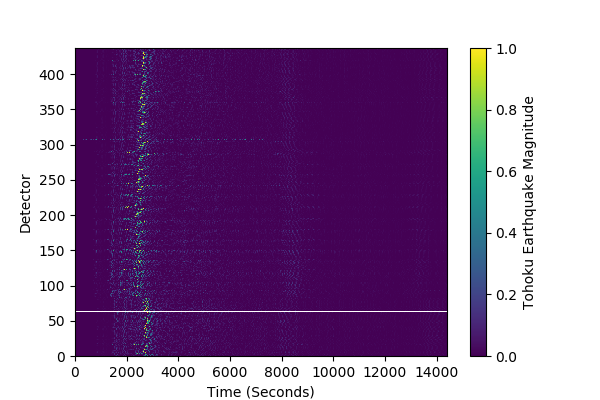

IntSlider(value=1500, description='Select Time(s):', layout=Layout(min_width='100%'), max=14400)

HBox(children=(Figure(animation_duration=150, axes=[Axis(label='Time (seconds)', scale=LinearScale(), tick_format='0.f'), Axis(label='Magnitude', orientation='vertical', scale=LinearScale(max=1.7, min=-1.7), tick_format='0.3f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['red'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale(max=1.7, min=-1.7)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([    0,     1,     2, ..., 11420, 11421, 11422]), y=array([-0.00016568, -0.00016734, -0.00016772, ...,  0.0056823 ,
        0.006048  ,  0.0062703 ]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Waveform for station: 352 for the time period: 11423'), Figure(axes=[ColorAxis(label='Magnitude', scale=ColorScale(max=1.0, min=-1.6588000000000001, scheme='OrRd'), side='left', tick_format='0.3f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Map(color={1211: -0.17132585365887668, 1193: -0.20186388881037107, 1228: -0.16803766693343675, 1244: -0.18943000537958662, 1194: -0.23668016376505088, 1288: -0.20306867841876924, 1257: -0.18632111745538327, 1165: -0.20405593106682585, 1272: -0.21753082598160636, 1151: -0.20551331671361317, 1179: -0.16428272226808818, 1122: -0.21314759495075086, 1245: -0.2235440079079611, 1195: -0.1947190833440073, 1123: -0.2244755993232213, 1212: -0.22057980224620696, 1137: -0.21777860747345174, 1289: -0.20109576763580547, 1258: -0.213417451096262, 1229: -0.23443523463065727, 1083: -0.18487035034392785, 1094: -0.21615456157883664, 1213: -0.1942127354575435, 1196: -0.21881142832251718, 1152: -0.18240519501891128, 1166: -0.180629588431134, 1107: -0.19414811060204723, 1003: -0.1965705712386863, 1376: -0.20316729232227715, 1332: -0.1848465994083702, 1419: -0.22898882800560824, 1016: -0.23852636623439155, 1180: -0.18301021522863872, 1399: -0.16000712689368646, 1290: -0.19062367263378147, 1004: -0.20525461473329898, 1420: -0.21400177951244606, 1346: -0.16987907501748054, 1230: -0.22333798715004996, 1273: -0.2506287712580982, 1318: -0.20266504337370436, 1362: -0.13292400081580305, 1214: -0.2250815900009062, 1197: -0.21840529748300025, 1181: -0.21474755864209813, 1153: -0.20666187818198264, 1167: -0.21761816697901978, 1138: -0.19837349974078555, 1124: -0.22012889834644206, 1108: -0.19410290446316908, 1215: -0.2018007149790738, 1095: -0.2155147423379275, 1084: -0.21069482972598932, 1198: -0.21943582133332165, 1271: -0.19857420191865605, 1182: -0.21718486947648896, 1243: -0.1649604238669537, 1154: -0.21358676397890272, 1168: -0.22164625239240662, 1139: -0.20789372636575476, 1125: -0.20462972669250568, 1096: -0.22214232046536497, 1183: -0.2222425830533974, 1199: -0.22717354999717584, 1216: -0.19709459191367712, 1347: -0.19461040267250335, 1109: -0.18952804675424084, 1155: -0.22336393929209863, 1319: -0.17761136615415307, 1169: -0.22134268347985595, 1333: -0.21426949182615132, 1085: -0.19626811449945591, 1291: -0.2516276686644337, 1305: -0.1736025333227543, 1274: -0.24394349984190858, 1246: -0.22830883263524288, 1140: -0.2225508720076185, 1126: -0.19806334196030279, 1259: -0.19936553114990752, 1231: -0.20602900469997348, 1110: -0.18740942712750597, 1363: -0.21113178980721198, 1378: -0.22339726958085693, 1217: -0.21053088404856304, 1334: -0.2171124259524736, 1348: -0.20956782631606097, 1200: -0.208424207143404, 1097: -0.1860362415986301, 1086: -0.18738226784803083, 1320: -0.1973525939660732, 1184: -0.2243967265172932, 1306: -0.17816247013552935, 1170: -0.2158411122640868, 1292: -0.24965538449690294, 1156: -0.22718043994042653, 1260: -0.2298351229813102, 1379: -0.21507522849147123, 1275: -0.1727896258344439, 1141: -0.22305316188095758, 1364: -

In [36]:
## Plot the spectogram 
make_spect()

## display the sliders 
#H1 = widgets.HBox([ipywidgets.HTML("00:00:00"), slider, ipywidgets.HTML("04:00:00")])
states_map.selected=[]

display(slider)

wave.x, wave.y = wave_form_detect(initial_station, initial_timeinterval)

waveform.title = 'Waveform for station: ' + str(initial_station-1000) + ' for the time period: ' + str(initial_timeinterval)

## make waveform and detector plot side by side 
plots = widgets.HBox( children=[waveform,detector_loc ])
 
    
## display the plots 
plots